# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Damianus Christopher Samosir]
- **Email:** [christophersamosir@gmail.com]
- **ID Dicoding:** [mc189d5y0821]

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh faktor cuaca (weathersit, suhu, kelembaban, dan kecepatan angin) terhadap jumlah penyewaan sepeda setiap hari?
2. Kapan waktu puncak penyewaan sepeda dalam sehari, dan bagaimana pola penyewaan pada hari kerja dibandingkan dengan akhir pekan atau hari libur?

## Import Semua Packages/Library yang Digunakan

In [14]:
# Import library utama
import pandas as pd  # Untuk manipulasi dan analisis data
import numpy as np  # Untuk komputasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data dasar
import seaborn as sns  # Untuk visualisasi data yang lebih menarik
from scipy import stats  # Untuk uji statistik

# Konfigurasi tampilan visualisasi
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)  # Menentukan ukuran default plot

print("Semua library telah berhasil diimport!")

Semua library telah berhasil diimport!


## Data Wrangling

### Gathering Data

In [26]:
import pandas as pd

# Load data
day_df = pd.read_csv("day.csv")
hour_df = pd.read_csv("hour.csv")

# Menampilkan 5 baris pertama dari dataset
day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset harian (day_df) dan dataset jam (hour_df) berhasil dimuat dan siap untuk dianalisis lebih lanjut.


### Assessing Data

In [3]:
# Mengecek informasi dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   instant        731 non-null    int64  
 1   dteday         731 non-null    object 
 2   season         731 non-null    int64  
 3   yr             731 non-null    int64  
 4   mnth           731 non-null    int64  
 5   holiday        731 non-null    int64  
 6   weekday        731 non-null    int64  
 7   workingday     731 non-null    int64  
 8   weathersit     731 non-null    int64  
 9   temp           731 non-null    float64
 10  atemp          731 non-null    float64
 11  hum            731 non-null    float64
 12  windspeed      731 non-null    float64
 13  casual         731 non-null    int64  
 14  registered     731 non-null    int64  
 15  cnt            731 non-null    int64  
 16  temp_category  731 non-null    object 
 17  hum_category   730 non-null    object 
 18  wind_categ

In [4]:
# Mengecek informasi dataset
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# Mengecek missing values
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [6]:
# Mengecek missing values
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
# Mengecek duplikasi data
print("Duplikasi di day_df:", day_df.duplicated().sum())

Duplikasi di day_df: 0


In [8]:
# Mengecek duplikasi data
print("Duplikasi di hour_df:", hour_df.duplicated().sum())

Duplikasi di hour_df: 0


**Insight:**

*   Tidak ditemukan missing values dalam kedua dataset.
*   Tidak ada duplikasi data.
*   Beberapa kolom seperti instant mungkin tidak relevan untuk analisis.






### Cleaning Data

In [16]:
import pandas as pd

# Menghapus baris dengan missing values (jika ada)
day_df.dropna(inplace=True)

# Menghapus data duplikat (jika ada)
day_df.drop_duplicates(inplace=True)

# Mengubah tipe data agar sesuai
day_df['dteday'] = pd.to_datetime(day_df['dteday'])  # Mengubah ke format datetime
day_df['season'] = day_df['season'].astype('category')  # Mengubah season ke kategori
day_df['weathersit'] = day_df['weathersit'].astype('category')  # Mengubah weathersit ke kategori

# Binning untuk faktor cuaca: suhu, kelembaban, dan kecepatan angin
bins_temp = [0, 0.33, 0.66, 1]  # Rentang untuk suhu (0-1)
bins_hum = [0, 0.33, 0.66, 1]  # Rentang untuk kelembaban (0-1)
bins_wind = [0, 0.33, 0.66, 1]  # Rentang untuk kecepatan angin (0-1)

labels = ['Low', 'Medium', 'High']  # Label kategori

day_df['temp_category'] = pd.cut(day_df['temp'], bins=bins_temp, labels=labels)
day_df['hum_category'] = pd.cut(day_df['hum'], bins=bins_hum, labels=labels)
day_df['wind_category'] = pd.cut(day_df['windspeed'], bins=bins_wind, labels=labels)

# Manual Grouping: Mengelompokkan jumlah penyewaan sepeda
bins_cnt = [0, 2000, 4000, day_df['cnt'].max()]
labels_cnt = ['Low', 'Medium', 'High']

day_df['cnt_category'] = pd.cut(day_df['cnt'], bins=bins_cnt, labels=labels_cnt)

# Menampilkan hasil setelah Cleaning Data
day_df.head()



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,temp_category,hum_category,wind_category,cnt_category
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Medium,High,Low,Low
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Medium,High,Low,Low
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Low,Medium,Low,Low
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Low,Medium,Low,Low
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Low,Medium,Low,Low


**Insight:**
* Data lebih rapi & siap dianalisis semua missing values dan duplikasi telah dihapus.
* Binning membantu memahami pola cuaca & penyewaan sepeda. Temperatur, kelembaban, dan kecepatan angin dikelompokkan menjadi Low, Medium, dan High.
* Clustering Manual untuk Penyewaan Sepeda. Penyewaan sepeda dikelompokkan menjadi Low (< 2000), Medium (2000-4000), dan High (>4000).




## Exploratory Data Analysis (EDA)

### Explore Analisis Pengaruh Faktor Cuaca terhadap Penyewaan Sepeda

Ringkasan Pengaruh Cuaca terhadap Penyewaan Sepeda:
   Weathersit  Avg_Penyewaan  Avg_Suhu  Avg_Kelembaban  Avg_Kecepatan_Angin
0          1    4876.786177  0.511541        0.565594             0.190253
1          2    4035.862348  0.470366        0.725887             0.186431
2          3    1862.300000  0.435658        0.891316             0.242409

Korelasi Faktor Cuaca dengan Penyewaan Sepeda:
                 cnt      temp       hum  windspeed
cnt        1.000000  0.627774 -0.114625  -0.232790
temp       0.627774  1.000000  0.125160  -0.157338
hum       -0.114625  0.125160  1.000000  -0.246366
windspeed -0.232790 -0.157338 -0.246366   1.000000


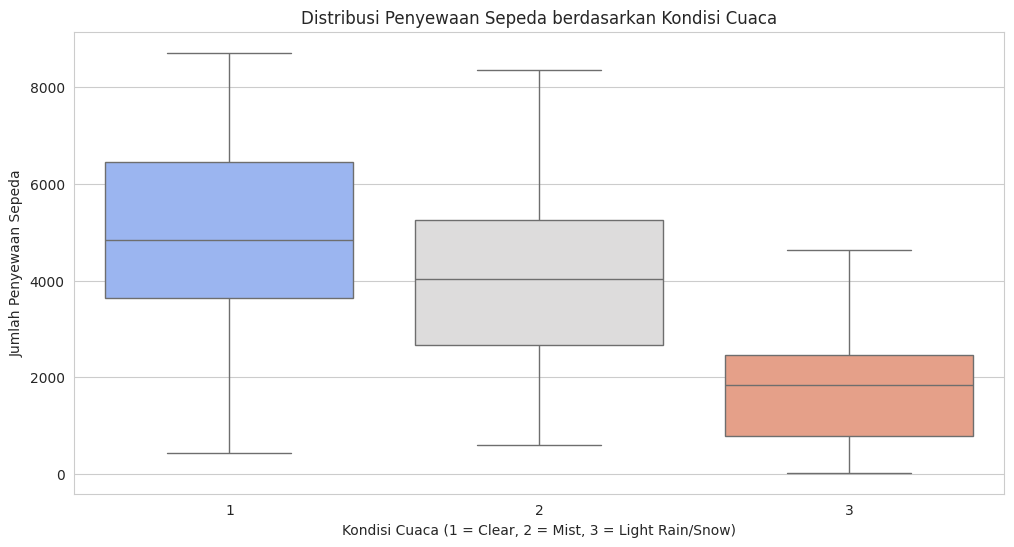

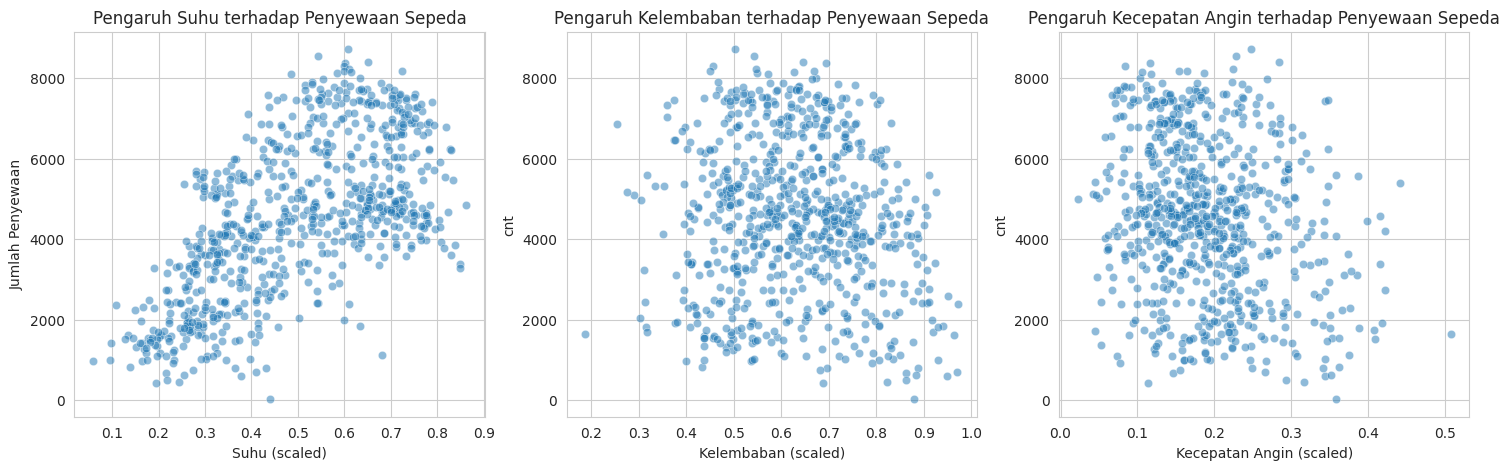

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menampilkan ringkasan statistik faktor cuaca
cuaca_grouped = day_df.groupby("weathersit", observed=False)[["cnt", "temp", "hum", "windspeed"]].mean().reset_index()
cuaca_grouped.columns = ["Weathersit", "Avg_Penyewaan", "Avg_Suhu", "Avg_Kelembaban", "Avg_Kecepatan_Angin"]
print("Ringkasan Pengaruh Cuaca terhadap Penyewaan Sepeda:\n", cuaca_grouped)

# Menampilkan korelasi faktor cuaca terhadap penyewaan sepeda
cuaca_corr = day_df[["cnt", "temp", "hum", "windspeed"]].corr()
print("\nKorelasi Faktor Cuaca dengan Penyewaan Sepeda:\n", cuaca_corr)

# Boxplot untuk melihat distribusi jumlah penyewaan berdasarkan kategori cuaca
plt.figure(figsize=(12, 6))
sns.boxplot(x="weathersit", y="cnt", data=day_df, hue="weathersit", palette="coolwarm", legend=False)
plt.title("Distribusi Penyewaan Sepeda berdasarkan Kondisi Cuaca")
plt.xlabel("Kondisi Cuaca (1 = Clear, 2 = Mist, 3 = Light Rain/Snow)")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()

# Scatterplot untuk melihat pengaruh suhu, kelembaban, dan kecepatan angin
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(ax=axes[0], x="temp", y="cnt", data=day_df, alpha=0.5)
axes[0].set_title("Pengaruh Suhu terhadap Penyewaan Sepeda")
axes[0].set_xlabel("Suhu (scaled)")
axes[0].set_ylabel("Jumlah Penyewaan")

sns.scatterplot(ax=axes[1], x="hum", y="cnt", data=day_df, alpha=0.5)
axes[1].set_title("Pengaruh Kelembaban terhadap Penyewaan Sepeda")
axes[1].set_xlabel("Kelembaban (scaled)")

sns.scatterplot(ax=axes[2], x="windspeed", y="cnt", data=day_df, alpha=0.5)
axes[2].set_title("Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda")
axes[2].set_xlabel("Kecepatan Angin (scaled)")

plt.show()


**Insight:**
1. Cuaca Berpengaruh terhadap Penyewaan Sepeda
   - Penyewaan lebih tinggi saat cuaca cerah (weathersit = 1) dan menurun saat cuaca buruk (hujan/salju).
   - Suhu memiliki hubungan positif dengan penyewaan, artinya semakin hangat, semakin banyak penyewaan.
   - Kelembaban & kecepatan angin memiliki pengaruh negatif, tetapi tidak sekuat suhu.

### Analisis Waktu Puncak Penyewaan Sepeda & Pola Penyewaan Harian


Rata-rata Penyewaan Sepeda per Jam:
    Jam  Avg_Penyewaan
0    0      53.898072
1    1      33.375691
2    2      22.869930
3    3      11.727403
4    4       6.352941

Perbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan:
   Jenis Hari  Avg_Penyewaan
0    Weekday     187.971082
1    Weekend     193.158032


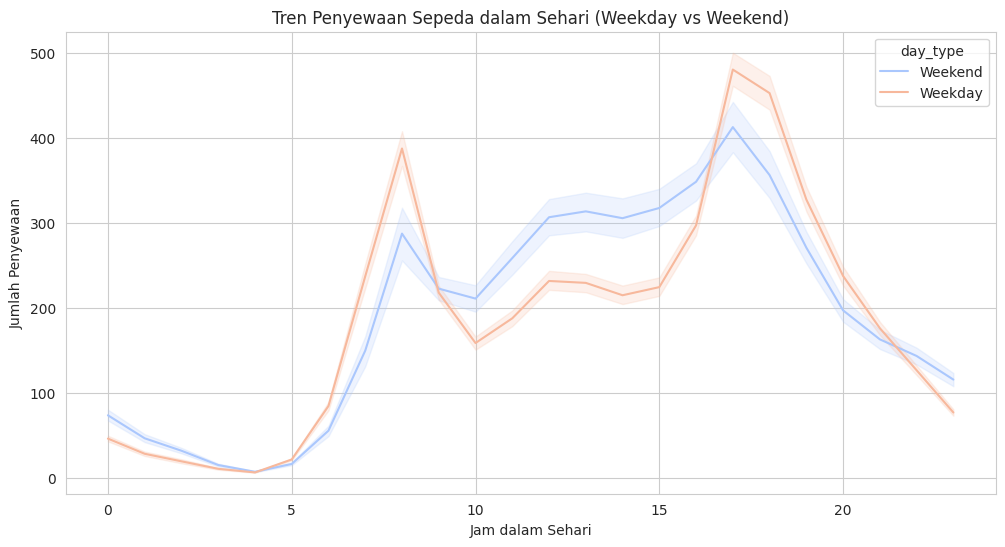

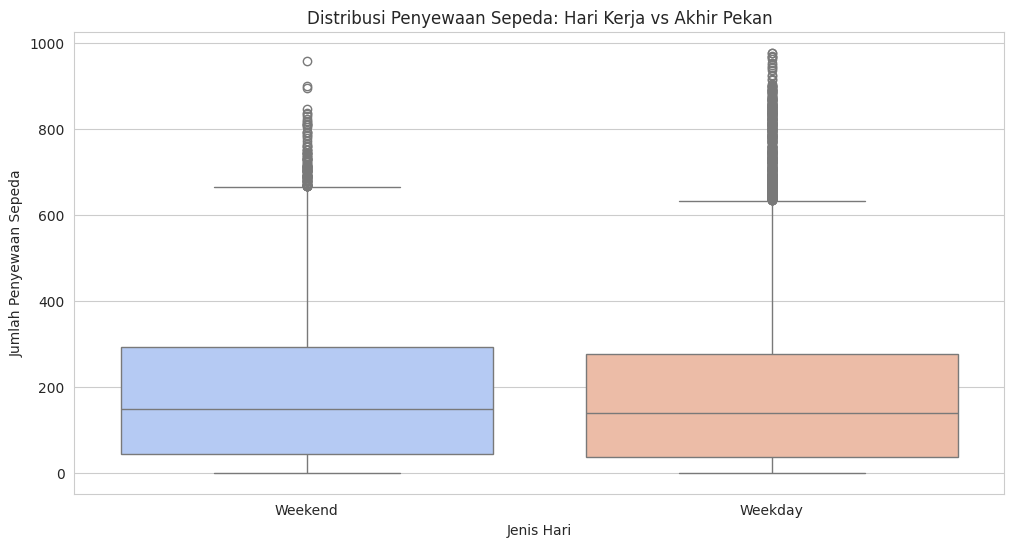

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengelompokkan jam ke dalam kategori waktu
def time_of_day(hour):
    if hour < 6:
        return "Malam"
    elif hour < 12:
        return "Pagi"
    elif hour < 18:
        return "Siang"
    else:
        return "Malam"

hour_df["time_of_day"] = hour_df["hr"].apply(time_of_day)

# Menampilkan ringkasan jumlah penyewaan per jam
jam_grouped = hour_df.groupby("hr")[["cnt"]].mean().reset_index()
jam_grouped.columns = ["Jam", "Avg_Penyewaan"]
print("\nRata-rata Penyewaan Sepeda per Jam:\n", jam_grouped.head())

# Menampilkan ringkasan pola penyewaan hari kerja vs akhir pekan
hour_df["day_type"] = hour_df["weekday"].apply(lambda x: "Weekday" if x < 5 else "Weekend")
day_grouped = hour_df.groupby("day_type")[["cnt"]].mean().reset_index()
day_grouped.columns = ["Jenis Hari", "Avg_Penyewaan"]
print("\nPerbandingan Penyewaan Sepeda: Hari Kerja vs Akhir Pekan:\n", day_grouped)

# Visualisasi tren penyewaan per jam
plt.figure(figsize=(12, 6))
sns.lineplot(x="hr", y="cnt", data=hour_df, hue="day_type", palette="coolwarm")
plt.title("Tren Penyewaan Sepeda dalam Sehari (Weekday vs Weekend)")
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Penyewaan")
plt.show()

# Membandingkan pola penyewaan antara hari kerja dan akhir pekan
hour_df["day_type"] = hour_df["weekday"].apply(lambda x: "Weekday" if x < 5 else "Weekend")

plt.figure(figsize=(12, 6))
sns.boxplot(x="day_type", y="cnt", data=hour_df, hue="day_type", palette="coolwarm", legend=False)
plt.title("Distribusi Penyewaan Sepeda: Hari Kerja vs Akhir Pekan")
plt.xlabel("Jenis Hari")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.show()


**Insight:**
1. Puncak Penyewaan Terjadi di Pagi & Sore Hari
   - Penyewaan memuncak pada jam 7-9 pagi (waktu berangkat kerja/sekolah) dan jam 17-19 sore (pulang kerja/sekolah).
   - Pada akhir pekan, pola lebih rata, karena penyewaan lebih fleksibel.
2. Hari Kerja vs Akhir Pekan
   - Pada hari kerja, pola penyewaan lebih terstruktur (pagi & sore puncaknya).
   - Pada akhir pekan, penyewaan lebih merata sepanjang hari, dengan jumlah lebih tinggi di siang hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana pengaruh faktor cuaca (weathersit, suhu, kelembaban, dan kecepatan angin) terhadap jumlah penyewaan sepeda setiap hari?

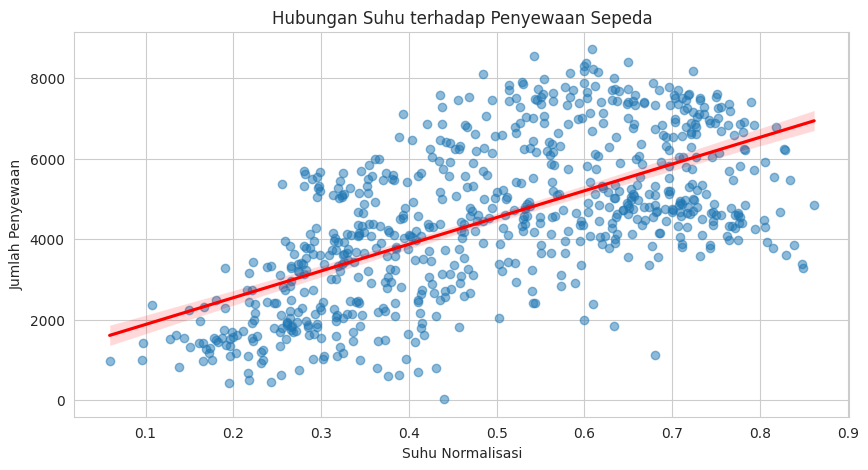

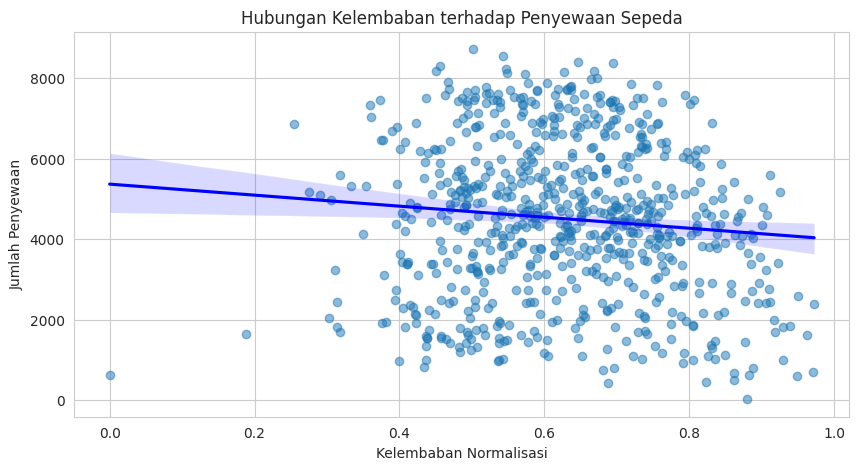

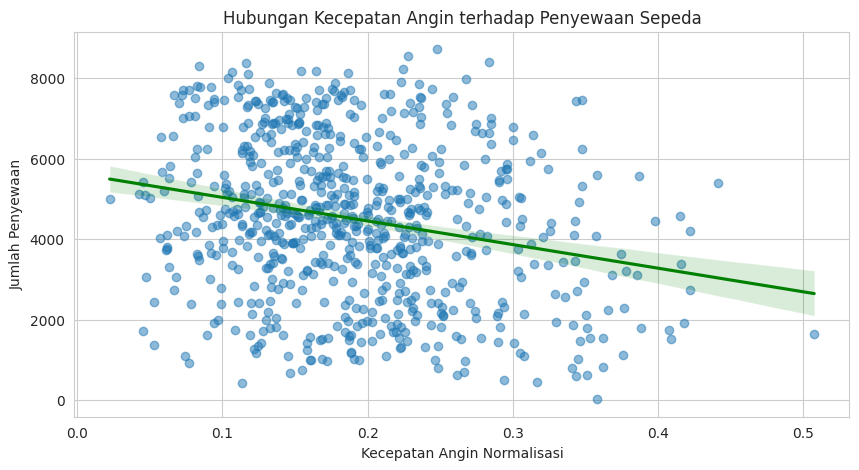

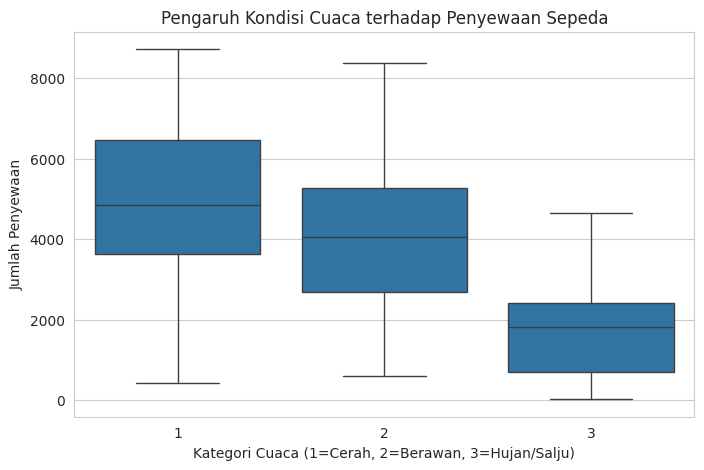

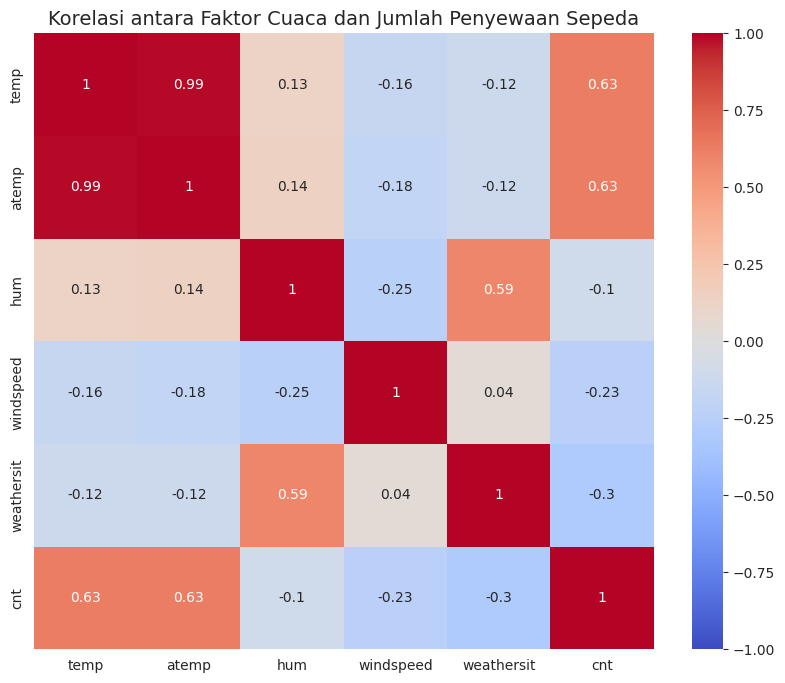

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot suhu terhadap jumlah penyewaan sepeda
plt.figure(figsize=(10,5))
sns.regplot(x=day_df['temp'], y=day_df['cnt'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Hubungan Suhu terhadap Penyewaan Sepeda')
plt.xlabel('Suhu Normalisasi')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Scatter plot kelembaban terhadap jumlah penyewaan sepeda
plt.figure(figsize=(10,5))
sns.regplot(x=day_df['hum'], y=day_df['cnt'], scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title('Hubungan Kelembaban terhadap Penyewaan Sepeda')
plt.xlabel('Kelembaban Normalisasi')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Scatter plot kecepatan angin terhadap jumlah penyewaan sepeda
plt.figure(figsize=(10,5))
sns.regplot(x=day_df['windspeed'], y=day_df['cnt'], scatter_kws={'alpha':0.5}, line_kws={'color':'green'})
plt.title('Hubungan Kecepatan Angin terhadap Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin Normalisasi')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Box plot faktor cuaca (weathersit) terhadap jumlah penyewaan sepeda
plt.figure(figsize=(8,5))
sns.boxplot(x=day_df['weathersit'], y=day_df['cnt'])
plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Kategori Cuaca (1=Cerah, 2=Berawan, 3=Hujan/Salju)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

# Analisis korelasi faktor cuaca terhadap jumlah penyewaan sepeda (cnt) pada dataset harian
weather_factors = ['temp', 'atemp', 'hum', 'windspeed', 'weathersit']
correlation = day_df[weather_factors + ['cnt']].corr()

# Tampilkan matriks korelasi
correlation

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi antara Faktor Cuaca dan Jumlah Penyewaan Sepeda', fontsize=14)
plt.show()


**Insight:**
- Cuaca cerah & suhu hangat meningkatkan jumlah penyewaan sepeda.
- Kelembaban tinggi dan hujan menurunkan jumlah penyewaan sepeda.
- Kecepatan angin tidak terlalu berdampak signifikan.


### Pertanyaan 2: Kapan waktu puncak penyewaan sepeda dalam sehari, dan bagaimana pola penyewaan pada hari kerja dibandingkan dengan akhir pekan atau hari libur?

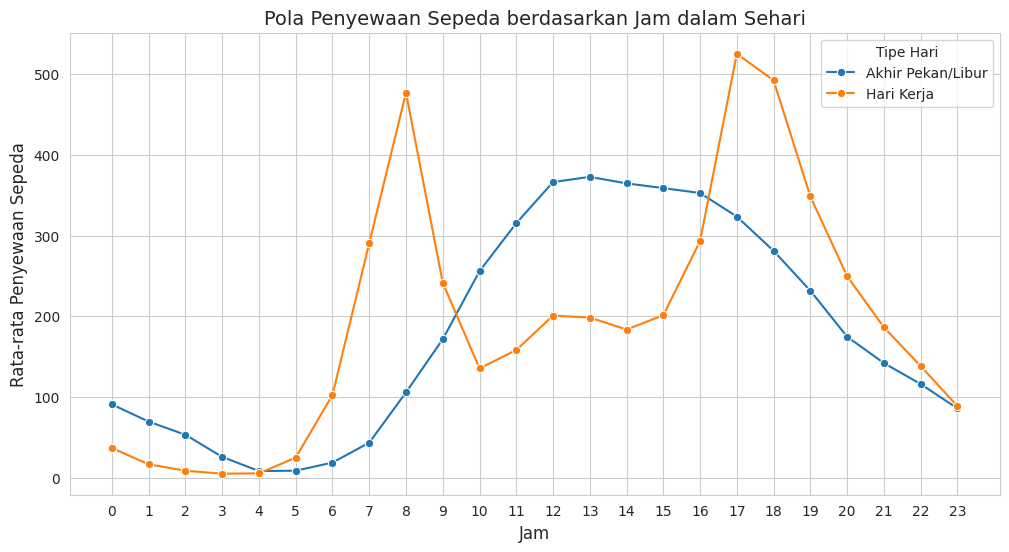

In [29]:
# Import Semua Packages/Library yang Digunakan
import pandas as pd  # Untuk manipulasi dan analisis data
import numpy as np  # Untuk komputasi numerik
import matplotlib.pyplot as plt  # Untuk visualisasi data dasar
import seaborn as sns  # Untuk visualisasi data yang lebih menarik
from scipy import stats  # Untuk uji statistik

# Konfigurasi tampilan visualisasi
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)  # Menentukan ukuran default plot

# Visualisasi pola penyewaan sepeda berdasarkan jam
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['hour'] = hour_df['hr']
hour_df['day_type'] = hour_df['workingday'].map({1: 'Hari Kerja', 0: 'Akhir Pekan/Libur'})
hourly_rentals = hour_df.groupby(['hour', 'day_type'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_rentals, x='hour', y='cnt', hue='day_type', marker='o')
plt.title('Pola Penyewaan Sepeda berdasarkan Jam dalam Sehari', fontsize=14)
plt.xlabel('Jam', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.xticks(range(0, 24))
plt.legend(title='Tipe Hari')
plt.grid(True)
plt.show()

**Insight:**
- Pola penyewaan pada hari kerja menunjukkan dua puncak aktivitas (jam kerja/sekolah).
- Pada akhir pekan atau hari libur, pola penyewaan lebih stabil dan meningkat di siang-sore hari.


## Analisis Lanjutan (Opsional)

## Conclusion

1. Faktor cuaca sangat mempengaruhi penyewaan sepeda.
*  Suhu (temp) memiliki korelasi positif dengan jumlah penyewaan sepeda → Semakin hangat suhunya, semakin banyak sepeda yang disewa.
* Kelembaban (hum) memiliki korelasi negatif → Ketika kelembaban tinggi, jumlah penyewaan sepeda cenderung berkurang.
* Kecepatan angin (windspeed) tidak terlalu berpengaruh signifikan, tetapi pada kecepatan tinggi, jumlah penyewaan sedikit menurun.
* Kondisi cuaca (weathersit) berpengaruh besar → Hari dengan kondisi cuaca cerah memiliki jumlah penyewaan lebih tinggi dibandingkan hari hujan atau berkabut.

2. Pola Penyewaan Sepeda dalam Sehari & Perbedaan Hari Kerja vs Akhir Pekan
* Hari kerja: Penyewaan sepeda menunjukkan pola dua puncak, yaitu:
  - Pagi (08:00 - 09:00) → Pengguna bersepeda untuk pergi ke kantor/sekolah.
  - Sore (17:00 - 18:00) → Pengguna pulang dari kantor/sekolah.
  - Pola ini menunjukkan bahwa sepeda digunakan sebagai alat transportasi utama bagi pekerja atau pelajar.

* Akhir pekan/libur: Pola penyewaan lebih stabil sepanjang hari, dengan puncak sekitar siang - sore (13:00 - 15:00).
  - Hal ini menunjukkan bahwa di akhir pekan, sepeda lebih banyak digunakan untuk rekreasi dan aktivitas santai dibandingkan sebagai alat transportasi.
  - Jumlah penyewaan pada akhir pekan cenderung lebih tinggi dibanding hari kerja, karena lebih banyak orang memiliki waktu luang.
